In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import numpy as np 
import random

In [ ]:
matrix = np.zeros((200,200))
resMatrix = np.zeros((200,200))
solutionMatrix = np.zeros((200,200))

In [ ]:
def randGen():
  return random.randrange(0,200)


In [ ]:
def generateWeights(p1, p2):
  weightList = [0,0,0,0]
  #WeighList= [UpWeight, DownWeight, RightWeight, LeftWeight]
  deltaX = p2[0]-p1[0]
  deltaY = p2[1]-p1[1]

  if deltaX>0:
    weightList[2] = 100
  elif deltaX<0:
    weightList[3] = 100


  if deltaY>0:
    weightList[0] = 100
  elif deltaY<0:
    weightList[1]= 100
  

  frequency  = weightList.count(100)
  newWeight = 100/frequency
  for i in range(len(weightList)):
    if weightList[i]==100:
      weightList[i]= newWeight;
  return weightList


In [ ]:

def movePointer(weightList,curPoint,finPoint,layerLabel,firstIter):

  if firstIter==True:
    solutionMatrix[curPoint[0]][curPoint[1]]=1

  #0 = up, 1 = down, 2 = right, 3 = left 
  if matrix[curPoint[0]][curPoint[1]]==0:
    matrix[curPoint[0]][curPoint[1]] = layerLabel
  else:
    matrix[curPoint[0]][curPoint[1]]=-6
  nonZeroIndexList = []
  for i in range(len(weightList)):
    if weightList[i] != 0 : 
      nonZeroIndexList.append(i)
  directionToMove = random.choice(nonZeroIndexList)
  if directionToMove==0:
      curPoint[1]+=1
  elif directionToMove==1:
      curPoint[1]-=1
  elif directionToMove==2:
      curPoint[0]+=1
  elif directionToMove==3:
      curPoint[0]-=1
  
  isReferencePoint = False
  if random.random()>0.1:
    isReferencePoint = True
  
  return [curPoint,isReferencePoint]



In [ ]:
firstIteration = True

for obj in range(67):
  obj+=1
  referencePointList = []
  if firstIteration==True:

    Point1 = [7,0]
    Point2 = [180,199]  
    
  else:

    if len(referencePointList)!=0:
      Point1 = random.choice(referencePointList)
      #additional
      referencePointList.remove(Point1)
      
    else:
      Point1 = [randGen(),randGen()]
    Point2 = [randGen(),randGen()]  


  while Point1[0]!=Point2[0] or Point1[1]!=Point2[1]:

    p1 = movePointer(generateWeights(Point1,Point2),Point1,Point2,obj,firstIteration)
    Point1 = p1[0]
    if p1[1]==True:
      referencePointList.append([Point1[0],Point1[1]])
  firstIteration = False
    



In [ ]:
boundaryDictionary = {(True,True,True,True):1,
                      (False,True,True,True):2,
                      (True,False,True,True):3,
                      (True,True,False,True):4,
                      (True,True,True,False):5,
                      (False,True,False,True):6,
                      (True,False,True,False):7,
                      (True,True,False,False):8,
                      (False,False,True,True):9,
                      (False,True,True,False):10,
                      (True,False,False,True):11,
                      (True,False,False,False):12,
                      (False,True,False,False):13,
                      (False,False,True,False):14,
                      (False,False,False,True):15,
                      }

In [ ]:
def getNonZeroNeightbours(Matrix, curPosition,wallDir):
    count = 0
    #north , east, south, west
    neighbourList = [False, False, False, False]


    if wallDir!= "East" and wallDir!= "NorthEast" and wallDir!="SouthEast":
      if Matrix[curPosition[0]][curPosition[1]+1]!=0:
        count+=1 
        neighbourList[1]= True
    if wallDir!="North" and wallDir!="NorthEast" and wallDir!="NorthWest":
      if Matrix[curPosition[0]-1][curPosition[1]]!=0:
        count+=1 
        neighbourList[0]= True
    if wallDir!="West"and wallDir!="SouthWest" and wallDir!="NorthWest":
      if Matrix[curPosition[0]][curPosition[1]-1]!=0:
        count+=1 
        neighbourList[3]= True
    if wallDir!="South" and wallDir!="SouthWest" and wallDir!="SouthEast":
      if Matrix[curPosition[0]+1][curPosition[1]]!=0:
        count+=1 
        neighbourList[2]= True


    #Direction constraints
    if dir=="North":
      neighbourList[0]=False
    elif dir =="East":
      neighbourList[1]=False
    elif dir == "South":
      neighbourList[2]=False
    elif dir == "West":
      neighbourList[3]=False
    if wallDir=="North":
      neighbourList[0]=False
    elif wallDir =="East":
      neighbourList[1]=False
    elif wallDir == "South":
      neighbourList[2]=False
    elif wallDir == "West":
      neighbourList[3]=False
    elif wallDir =="NorthEast":
      neighbourList[0]=False
      neighbourList[1]=False
    elif wallDir == "SouthEast":
      neighbourList[1]=False
      neighbourList[2]=False
    elif wallDir == "SouthWest":
      neighbourList[2]=False
      neighbourList[3]=False
    elif wallDir == "NorthWest":
      neighbourList[3]=False
      neighbourList[0]=False

    return tuple(neighbourList)
    
def getSelfNeightbours(Matrix,self,curPosition,wallDir):
    count = 0
    #north , east, south, west
    
    neighbourList = [False, False, False, False]
    

    if wallDir!= "East" and wallDir!= "NorthEast" and wallDir!="SouthEast":
      
      if Matrix[curPosition[0]][curPosition[1]+1]==self or Matrix[curPosition[0]][curPosition[1]+1]<0:
        count+=1 
        neighbourList[1]= True
    if wallDir!="North" and wallDir!="NorthEast" and wallDir!="NorthWest":
      if Matrix[curPosition[0]-1][curPosition[1]]==self or Matrix[curPosition[0]-1][curPosition[1]]<0:
        count+=1 
        neighbourList[0]= True
    if wallDir!="West"and wallDir!="NorthWest" and wallDir!="SouthWest":
      if Matrix[curPosition[0]][curPosition[1]-1]==self or Matrix[curPosition[0]][curPosition[1]-1]<0:
        count+=1 
        neighbourList[3]= True
    if wallDir!="South" and wallDir!="SouthWest" and wallDir!="SouthEast":
      if Matrix[curPosition[0]+1][curPosition[1]]==self or Matrix[curPosition[0]+1][curPosition[1]]<0:
        count+=1 
        neighbourList[2]= True

    #Directional Constrains kick in 
    if wallDir=="North":
      neighbourList[0]=False
    elif wallDir =="East":
      neighbourList[1]=False
    elif wallDir == "South":
      neighbourList[2]=False
    elif wallDir == "West":
      neighbourList[3]=False
    elif wallDir =="NorthEast":
      neighbourList[0]=False
      neighbourList[1]=False
    elif wallDir == "SouthEast":
      neighbourList[1]=False
      neighbourList[2]=False
    elif wallDir == "SouthWest":
      neighbourList[2]=False
      neighbourList[3]=False
    elif wallDir == "NorthWest":
      neighbourList[3]=False
      neighbourList[0]=False
    return tuple(neighbourList)
  


In [ ]:
def matrixLayerToPatternConversion(matrix): 
  
  for row in range(len(matrix)):
    for column in range(len(matrix[row])-1): 
      if matrix[row][column]!=0:
        #boundary
        if row!= 0 and row!=(len(matrix)-1) and column!=0 and column!=len((matrix[0])-1) :
          
          if matrix[row][column]<0:
            resMatrix[row][column]=boundaryDictionary.get(getNonZeroNeightbours(matrix,[row,column],None))
          else:
            resMatrix[row][column]=boundaryDictionary.get(getSelfNeightbours(matrix,matrix[row][column],[row,column],None))
        else:
          
          if row==0:
            mes = ""
            if column==0:
              mes = "NorthWest"
            elif column == len(matrix[0])-1:
              mes = 'NorthEast'
            else:
              mes = "North"
            if matrix[row][column]<0:
              resMatrix[row][column]=boundaryDictionary.get(getNonZeroNeightbours(matrix,[row,column],mes))
            else:
              resMatrix[row][column]=boundaryDictionary.get(getSelfNeightbours(matrix,matrix[row][column],[row,column],mes))
          elif row==len(matrix)-1:
            mes = ""
            if column==0:
              mes = "SouthWest"
            elif column == len(matrix[0])-1:
              mes = 'SouthEast'
            else:
              mes = "South"

            if matrix[row][column]<0:
              resMatrix[row][column]=boundaryDictionary.get(getNonZeroNeightbours(matrix,[row,column],mes))
            else:
              resMatrix[row][column]=boundaryDictionary.get(getSelfNeightbours(matrix,matrix[row][column],[row,column],mes))
          elif column ==0 :
            mes = "West"
            if matrix[row][column]<0:
              resMatrix[row][column]=boundaryDictionary.get(getNonZeroNeightbours(matrix,[row,column],mes))
            else:
              resMatrix[row][column]=boundaryDictionary.get(getSelfNeightbours(matrix,matrix[row][column],[row,column],mes))
          elif column == len(matrix[row])-1:
            mes = "East"
            if matrix[row][column]<0:
              resMatrix[row][column]=boundaryDictionary.get(getNonZeroNeightbours(matrix,[row,column],mes))
            else:
              resMatrix[row][column]=boundaryDictionary.get(getSelfNeightbours(matrix,matrix[row][column],[row,column],mes))
          else:
            print("Error: Check Code")
              
  return resMatrix


In [ ]:
matrixLayerToPatternConversion(matrix)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [ ]:
testImageArray = np.zeros((200,200,3))

In [ ]:
for i in range(len(matrix)):
  for o in range(len(matrix[i])):
    if matrix[i][o]!=0:
      testImageArray[i][o]=[255,255,255]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 


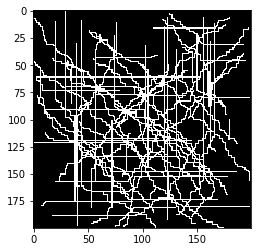

In [ ]:

plt.imshow(testImageArray, interpolation='nearest')
plt.show()

In [ ]:
testSolImageArray = np.zeros((200,200,3))
ExportArray = np.zeros((200,200))

In [ ]:
for i in range(len(solutionMatrix)):
  for o in range(len(solutionMatrix[i])):
    if matrix[i][o]!=0:
      ExportArray[i][o]=1
      testSolImageArray[i][o]=[255,255,255]
    if solutionMatrix[i][o]==1:
      testSolImageArray[i][o]=[255,0,0]

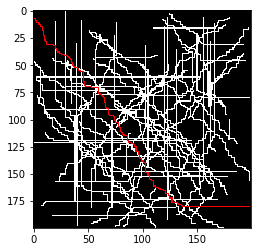

In [ ]:
plt.imshow(testSolImageArray, interpolation='nearest')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(ExportArray)

In [ ]:
# from google.colab import files
# data.to_csv("file.csv",index = False,)
# files.download("file.csv")